### agar plate with barteria

    - agar plate image 위에 bacteria 생성
    - random으로 생성 갯수 설정
    - plate image 불러오기
    - plate 의 width, height 계산하기
    - width, height의 범위 내에서 랜덤 좌표 생성
    - imagee smoothing 후 합성
        : PIL의 paste 함수 사용, 배경이 잘 없어지지 않음. cv2의 edges detection으로 박테리아 분리 시도, edges 부분을 인식하지 못함
        직접 함수 작성(이미지의 3사분위 수로 이미지의 특정 부분만을 추출하여, 원본 이미지에 붙어넣음)

In [1]:
#Setting
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

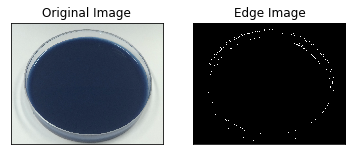

In [19]:
#Agar plate image
img = cv2.imread('./agar_2.jpg', 1)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
#Outline max and min value
def boundary(img):
    max_i = max_j = 0
    min_i = min_j = img.shape[0]
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if edges[i][j] == 255:
                if i >= max_i :
                    max_i = i
                if j >= max_j :
                    max_j = j
                if i <= min_i :
                    min_i = i
                if j <= min_j :
                    min_j = j
    return max_i, min_i, max_j, min_j

In [4]:
max_i, min_i, max_j, min_j = boundary(edges)
#a = make()
#sample_list = a.make_random(max_i, min_i, max_j, min_j)
#print(sample_list.shape)

In [5]:
h = (max_i - min_i) / 2 *0.9
w = (max_j - min_j) / 2 *0.9
h_cen = (max_i + min_i) / 2
w_cen = (max_j + min_j) / 2

In [6]:
print(h, w)

305.55 375.75


In [7]:
boundary(edges)

(707, 28, 945, 110)

### Define Starting Point

In [8]:
def make_random(max_i, min_i, max_j, min_j):
    num_sample = np.random.randint(100) #random sample 수
    sample_list = np.zeros(shape=[num_sample, 2])
    random_i = np.random.randint(low=min_i, high=max_i, size=num_sample)
    #random_j = w * np.sqrt(1-((random_i-h_cen)/h)**2) + w_cen
    #random_j = np.round(random_j, 0)
    random_j = np.random.randint(low=min_j, high=max_j, size=num_sample)

    for i in range(num_sample):
        if (((random_i[i]-h_cen)/h)**2 + ((random_j[i]-w_cen)/w)**2) <= 1:
            sample_list[i][0] = random_i[i]
            sample_list[i][1] = random_j[i]
        else:
            pass

    return sample_list

In [20]:
sample_list = make_random(max_i, min_i, max_j, min_j)

In [21]:
sample_list

array([[  0.,   0.],
       [398., 454.],
       [  0.,   0.],
       [494., 318.],
       [219., 711.],
       [238., 482.],
       [281., 349.],
       [ 81., 540.],
       [274., 288.],
       [256., 763.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [461., 282.],
       [158., 439.],
       [  0.,   0.],
       [243., 629.],
       [175., 238.],
       [  0.,   0.],
       [522., 379.],
       [563., 786.],
       [363., 293.],
       [638., 491.],
       [427., 801.],
       [216., 537.],
       [  0.,   0.],
       [278., 463.],
       [320., 252.],
       [339., 459.],
       [459., 437.],
       [386., 669.],
       [118., 524.],
       [258., 666.],
       [138., 608.],
       [660., 472.],
       [615., 623.],
       [189., 691.],
       [142., 366.],
       [138., 412.],
       [292., 581.],
       [114., 582.],
       [ 84., 661.],
       [557., 737.],
       [131., 472.],
       [234., 455.],
       [148., 397.],
       [218., 611.],
       [  0.,

### Define paste point

In [11]:
def paste_img(img_org,img, h_str, w_str):
    try:
        if h_str == 0 or w_str == 0 :
            pass
        else: 
            print('shape : ',img.shape[0], img.shape[1])
            print('start : ', h_str, w_str)
            for i in range(img.shape[0]):
                for j in range(img.shape[1]):
                    if np.average(img[i][j]) > np.percentile(img, 75):
                        #print('in if')
                        in_h = np.int(i+h_str)
                        in_w = np.int(j+w_str)
                        #print('complete in')
                        img_org[in_h][in_w] = img[i][j]
                        #print('img_org')
            print('end : ', in_h, in_w)
    except TypeError:
        print('TypeError')
        print('in_h ', in_h, 'in_w ', in_w)

In [12]:
def insert_image(img_agar, sample_list):
    for i in enumerate(sample_list):
        #Random image input
        num_img = np.random.randint(200)
        dir = './agar_plate_mj/img_' + np.str(num_img) + '.JPG'
        print(dir)
        sample_img = cv2.imread(dir, 1)
                
        #Paste agar Image
        paste_img(img_agar, sample_img, i[1][0], i[1][1])
        
    return img_agar

In [22]:
img_2 = insert_image(img, sample_list)

./agar_plate_mj/img_0.JPG
./agar_plate_mj/img_54.JPG
shape :  52 54
start :  398.0 454.0
end :  430 485
./agar_plate_mj/img_170.JPG
./agar_plate_mj/img_136.JPG
shape :  51 48
start :  494.0 318.0
end :  527 349
./agar_plate_mj/img_88.JPG
shape :  72 80
start :  219.0 711.0
end :  256 747
./agar_plate_mj/img_18.JPG
shape :  63 70
start :  238.0 482.0
end :  287 523
./agar_plate_mj/img_131.JPG
shape :  66 60
start :  281.0 349.0
end :  332 370
./agar_plate_mj/img_70.JPG
shape :  50 42
start :  81.0 540.0
end :  123 578
./agar_plate_mj/img_49.JPG
shape :  76 65
start :  274.0 288.0
end :  333 303
./agar_plate_mj/img_61.JPG
shape :  44 40
start :  256.0 763.0
end :  287 782
./agar_plate_mj/img_101.JPG
./agar_plate_mj/img_69.JPG
./agar_plate_mj/img_56.JPG
./agar_plate_mj/img_57.JPG
shape :  50 51
start :  461.0 282.0
end :  504 332
./agar_plate_mj/img_189.JPG
shape :  49 47
start :  158.0 439.0
end :  197 460
./agar_plate_mj/img_137.JPG
./agar_plate_mj/img_23.JPG
shape :  53 55
start :  243

In [23]:
cv2.imwrite('test8.jpg', img_2)

True

In [ ]:
#Define starting point
class make:
    def make_random(self, max_i, min_i, max_j, min_j):
        self.num_sample = np.random.randint(50) #random sample 수
        self.sample_list = np.zeros(shape=[self.num_sample, 2])
        self.random_i = np.random.randint(low=min_i, high=max_i, size=self.num_sample)
        self.random_j = np.random.randint(low=min_j, high=max_j, size=self.num_sample)

        for i in range(self.num_sample):
            self.sample_list[i][0] = self.random_i[i]
            self.sample_list[i][1] = self.random_j[i]

        return self.sample_list
    
    def delete_list(sample_list):
        for i in range(sample_list.shape[0]):
            if ((sample_list[i][0] / h)**2 + (sample_list[i][1] / w)**2) >= 1:
                smaple_list[i] = None
            
    
    def paste_img(img_org,img, h_str, w_str):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.average(img[i][j]) > np.percentile(img, 75):
                img_org[i+h_str][j+w_str] = img[i][j]
    
    def insert_image(self, num_sample, sample_list):
        for i in enumerate(sample_list):
            #Random image input
            num_img = np.random.randint(700)
            dir = './agar_plate_ey/img_' + num_img + 'jpg'
            sample_img = np.array(cv2.imread(dir,0))
            
            
            
            for j in range(sample_img.shape[0]):
                for k in range(smaple_img.shape[1]):6
                    

In [ ]:
max_i, min_i, max_j, min_j = boundary(edges)
a = make()
sample_list = a.make_random(max_i, min_i, max_j, min_j)
print(sample_list.shape)

In [ ]:
img2 = cv2.imread('./agar_plate.jpg')
n = np.array(img2)
n.shape

In [ ]:
for i in enumerate(sample_list):
    print(i[1][0])

In [ ]:

    str = './agar_plate_ey/img_'
        dir = str + np.str(i) + '.jpg'

        img = PIL.Image.open(dir)
        img = image_preprocessing(img)

### Image paste

In [ ]:
from PIL import ImageFilter

In [ ]:
img_2 = Image.open('./agar_plate.jpg').convert("RGBA")
img_3 = Image.open('./agar_plate_ey/img_302.jpg').convert("RGBA")

In [ ]:
img_3.mode

In [ ]:
im=Image.open('./agar_plate_ey/img_302.jpg')
#im=im.rotate(1)
im.save("e.jpg")
im2=im.convert("L")
im2.save("b.jpg")
threshold = np.percentile(np.array(im), 75)
im = im2.point(lambda p: p > threshold and 255)
im.save("d.jpg")
img="d.jpg"
#result = tesseract.ProcessPagesWrapper(img,api)

In [ ]:
plt.imshow(im, cmap='gray')

In [ ]:
img_5 = cv2.imread('./agar_plate_ey/img_2.jpg',1)
plt.imshow(img_5)

In [ ]:
def paste_img(img_org,img, h_str, w_str):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.average(img[i][j]) > np.percentile(img, 75):
                img_org[i+h_str][j+w_str] = img[i][j]

In [ ]:
paste_img(img_6, img_5, 200, 150)

In [ ]:
plt.imshow(img_6)

In [ ]:
cv2.imwrite('test6.jpg', img_6)

In [ ]:
np.average(img_5[0][0])

In [ ]:
def ii(img):
    for i in range(28):
        for j in range(28):
            if img[i][j] > np.percentile(img_5, 75):
                img[i][j] = np.array([255,255,255])
            else:
                img[i][j] = np.arrray([0,0,0])

In [ ]:
ii(img_5)

In [ ]:
plt.imshow(img_5)

In [ ]:
np.percentile(img_5, 75)

In [ ]:
img_6 = cv2.imread('./agar_plate.jpg', 1)
plt.imshow(img_6)

In [ ]:
img_6[100:128, 100:128] = img_5

In [ ]:
plt.imshow(img_6)

In [ ]:
#Agar plate image
img = cv2.imread('./agar_plate_ey/img_302.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
img_4.size

In [ ]:
po = (300, 400)

In [ ]:
img_4.show()

In [ ]:
img_4 = Image.open('./agar_plate_ey/img_302.jpg').convert("1")
blurImage = img_4.filter(ImageFilter.BLUR)

In [ ]:
blurImage.save("blu2.png")

In [ ]:
img_2.paste(img_5, po)

In [ ]:
img_2.paste(img_3, po, mask=img_3.split()[3])

In [ ]:
img_2.show()

In [ ]:
img_2.save("test.png", format="png")

In [ ]:
?Image.alpha_composite